In [1]:
#Import libraries

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Create a Pandas DataFrame from a CSV file

df = pd.read_csv('Model_Variables.csv')

In [3]:
#Explore the DataFrame

df.head(1)

,Student_ID,Student_Name,Grade,Gender,AP_Course_Title,Tri1_Mark,Tri2_Mark,Tri3_Mark,Tri1_Numeric_Grade,Tri2_Numeric_Grade,Tri3_Numeric_Grade,Average_Course_Grade,AP_Test_Score,AP_Test_Result,Transcript_Academic_Weighted_GPA,Transcript_Total_Weighted_GPA,SAT_Score
0,1,Student_1,12,F,Eng Lit AP,A-,A-,A,4.7,4.7,5.0,4.8,4,Pass,4.13,4.12,1410.0


In [4]:
df.describe()

,Student_ID,Grade,Tri1_Numeric_Grade,Tri2_Numeric_Grade,Tri3_Numeric_Grade,Average_Course_Grade,AP_Test_Score,Transcript_Academic_Weighted_GPA,Transcript_Total_Weighted_GPA,SAT_Score
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,605.000000
mean,61022.731844,11.181564,4.466201,4.420810,4.650698,4.512444,3.628492,3.898380,3.906690,1310.925620
std,7715.850216,0.733224,0.619296,0.662734,0.501703,0.529741,1.059871,0.387618,0.358631,158.377962
min,1.000000,10.000000,1.700000,0.000000,2.700000,2.330000,1.000000,2.020000,2.210000,710.000000
25%,55694.000000,11.000000,4.000000,4.000000,4.300000,4.182500,3.000000,3.700000,3.730000,1200.000000
50%,58019.000000,11.000000,4.700000,4.700000,4.700000,4.670000,4.000000,3.990000,3.990000,1320.000000
75%,67163.500000,12.000000,5.000000,5.000000,5.000000,4.900000,5.000000,4.200000,4.190000,1430.000000
max,78375.000000,12.000000,5.300000,5.300000,5.300000,5.300000,5.000000,4.430000,4.400000,1580.000000


In [5]:
df.shape

(716, 17)

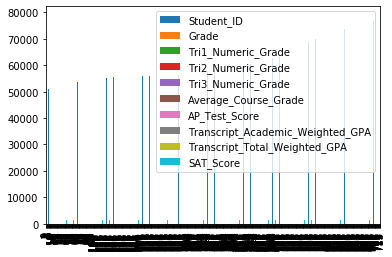

In [6]:
#Perform initial data visualization exploration

df.plot.bar()

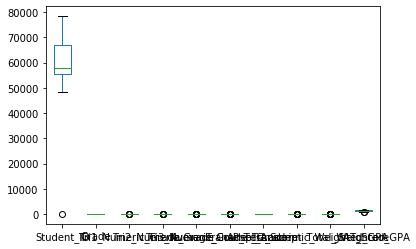

In [7]:
df.plot.box()

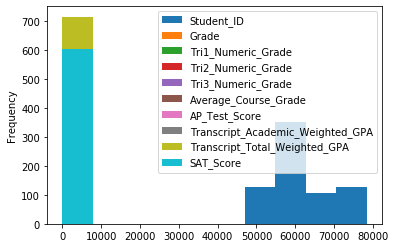

In [8]:
df.plot.hist()

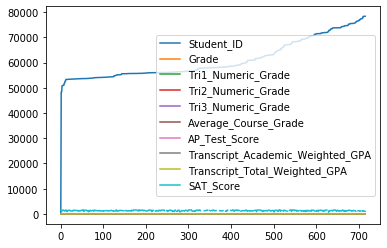

In [9]:
df.plot()

In [10]:
#Clean the data

df = df.dropna()

In [11]:
df.shape

(605, 17)

In [12]:
#Look for correlations between the variables

df.corr()

,Student_ID,Grade,Tri1_Numeric_Grade,Tri2_Numeric_Grade,Tri3_Numeric_Grade,Average_Course_Grade,AP_Test_Score,Transcript_Academic_Weighted_GPA,Transcript_Total_Weighted_GPA,SAT_Score
Student_ID,1.000000,-0.219026,-0.096056,-0.138019,-0.161052,-0.146098,-0.111056,-0.137741,-0.139256,-0.069322
Grade,-0.219026,1.000000,0.101986,0.041879,0.071504,0.080518,0.146165,0.039133,0.032828,-0.028148
Tri1_Numeric_Grade,-0.096056,0.101986,1.000000,0.786119,0.580781,0.904268,0.541002,0.585899,0.582553,0.412096
Tri2_Numeric_Grade,-0.138019,0.041879,0.786119,1.000000,0.644487,0.927934,0.570875,0.673146,0.672488,0.493822
Tri3_Numeric_Grade,-0.161052,0.071504,0.580781,0.644487,1.000000,0.815293,0.581177,0.604558,0.600857,0.482438
Average_Course_Grade,-0.146098,0.080518,0.904268,0.927934,0.815293,1.000000,0.634580,0.701911,0.699116,0.520574
AP_Test_Score,-0.111056,0.146165,0.541002,0.570875,0.581177,0.634580,1.000000,0.560577,0.559055,0.561424
Transcript_Academic_Weighted_GPA,-0.137741,0.039133,0.585899,0.673146,0.604558,0.701911,0.560577,1.000000,0.999288,0.751918
Transcript_Total_Weighted_GPA,-0.139256,0.032828,0.582553,0.672488,0.600857,0.699116,0.559055,0.999288,1.000000,0.751575
SAT_Score,-0.069322,-0.028148,0.412096,0.493822,0.482438,0.520574,0.561424,0.751918,0.751575,1.000000


In [13]:
#Groupby and aggregate analysis

groupby_df = df[['AP_Course_Title', 'AP_Test_Score']].groupby('AP_Course_Title').mean()

groupby_df

,AP_Test_Score
AP_Course_Title,
Biology AP,3.326531
Calc B/C,4.064516
Chemistry AP,3.090909
Eng Lang AP,3.545455
Eng Lit AP,3.888889
EuroHist AP,2.862069
MacroEcon AP,4.184615
Physics 1AP,4.434783
Psych AP,3.711111


In [14]:
groupby_df1 = df[['Average_Course_Grade', 'AP_Test_Score']].groupby('Average_Course_Grade').mean()

groupby_df1

,AP_Test_Score
Average_Course_Grade,
2.33,1.000000
2.70,3.000000
3.10,2.000000
3.13,3.000000
3.23,2.714286
3.33,2.454545
3.43,2.000000
3.47,2.500000
3.53,3.000000


<BarContainer object of 13 artists>

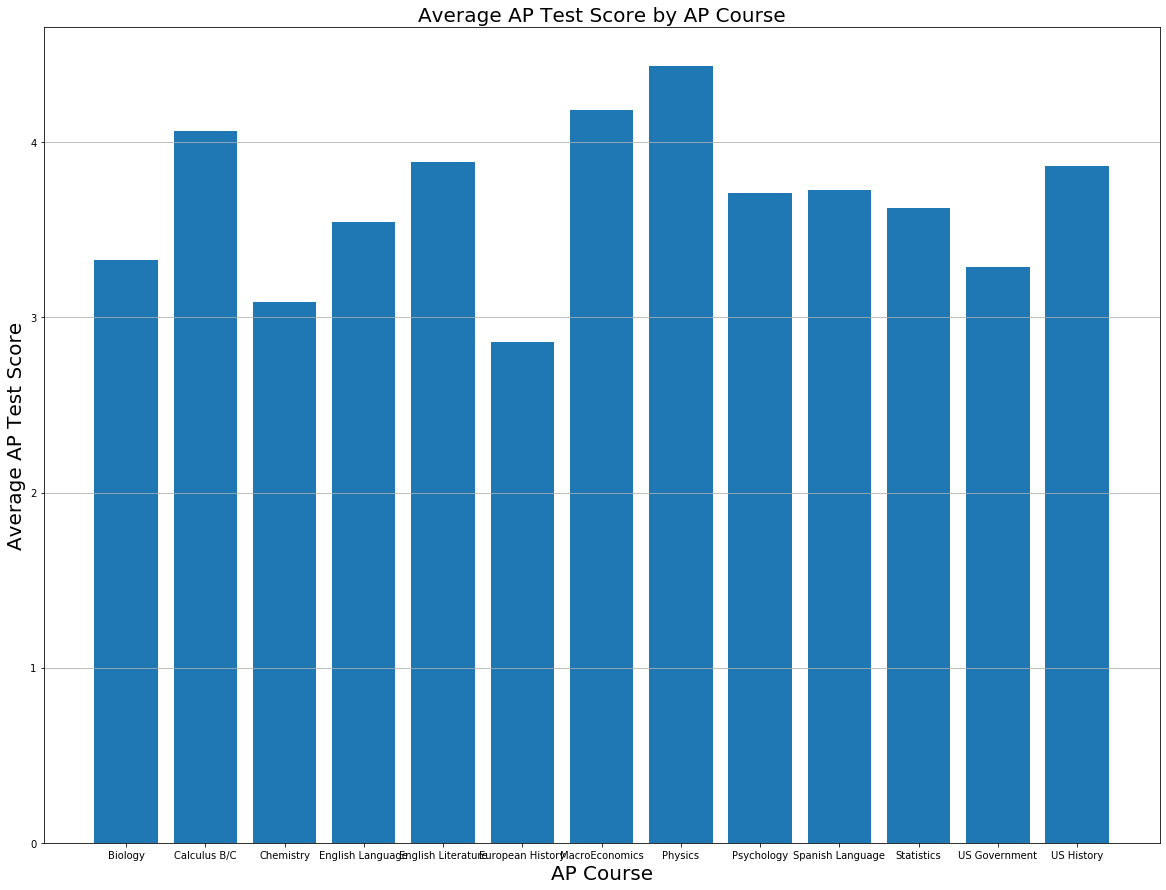

In [17]:
#Visualizing with matplotlib

data = {'Biology': 3.326531, 'Calculus B/C': 4.064516, 'Chemistry': 3.090909, 'English Language': 3.545455, 'English Literature': 3.888889, 'European History': 2.862069, 'MacroEconomics': 4.184615, 'Physics': 4.434783, 'Psychology': 3.711111, 'Spanish Language': 3.727273, 'Statistics': 3.625000, 'US Government': 3.289474, 'US History': 3.866667}
course = list(data.keys())
score = list(data.values())


fig, axis = plt.subplots(figsize = (20, 15))

axis.yaxis.grid(True)
axis.set_title('Average AP Test Score by AP Course', fontsize = 20)
axis.set_xlabel('AP Course', fontsize = 20)
axis.set_ylabel('Average AP Test Score', fontsize = 20)

axis.bar(course, score)

Text(0.5, 1.0, 'Average AP Test Score by AP Course and Average AP Course Grade')

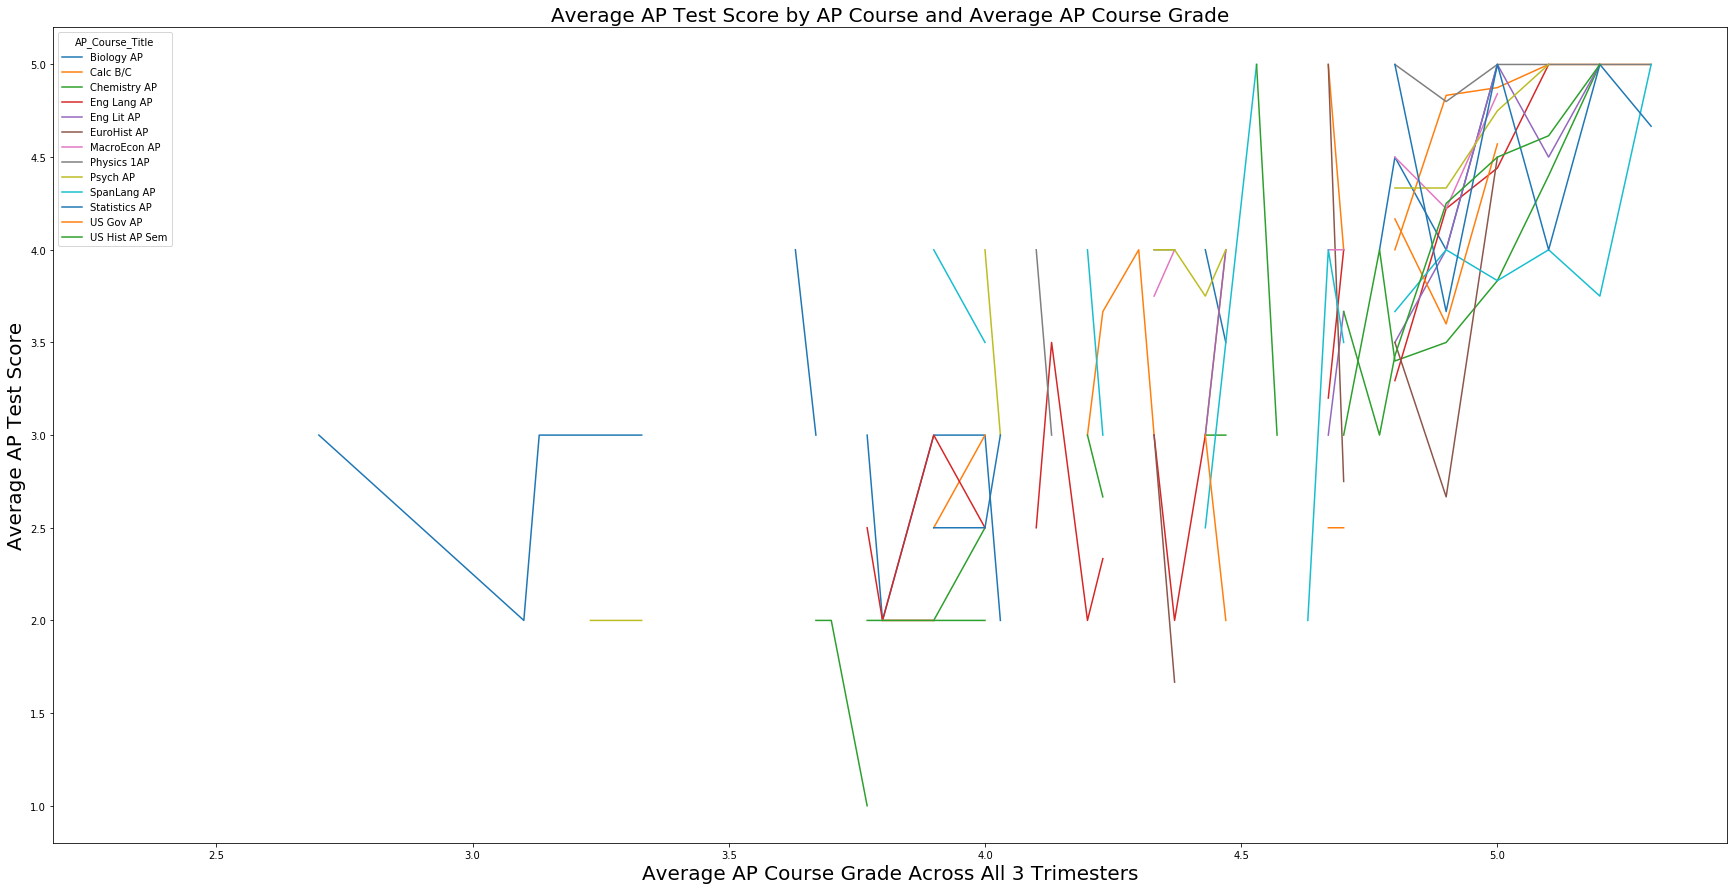

In [18]:
fig, ax = plt.subplots(figsize=(30,15))

df.groupby(['Average_Course_Grade', 'AP_Course_Title']).mean()['AP_Test_Score'].unstack().plot(ax=ax)

ax.set_xlabel('Average AP Course Grade Across All 3 Trimesters', fontsize = 20)
ax.set_ylabel('Average AP Test Score', fontsize = 20)
ax.set_title('Average AP Test Score by AP Course and Average AP Course Grade', fontsize = 20)

Text(0.5, 1.0, 'Average AP Test Score by Average AP Course Grade')

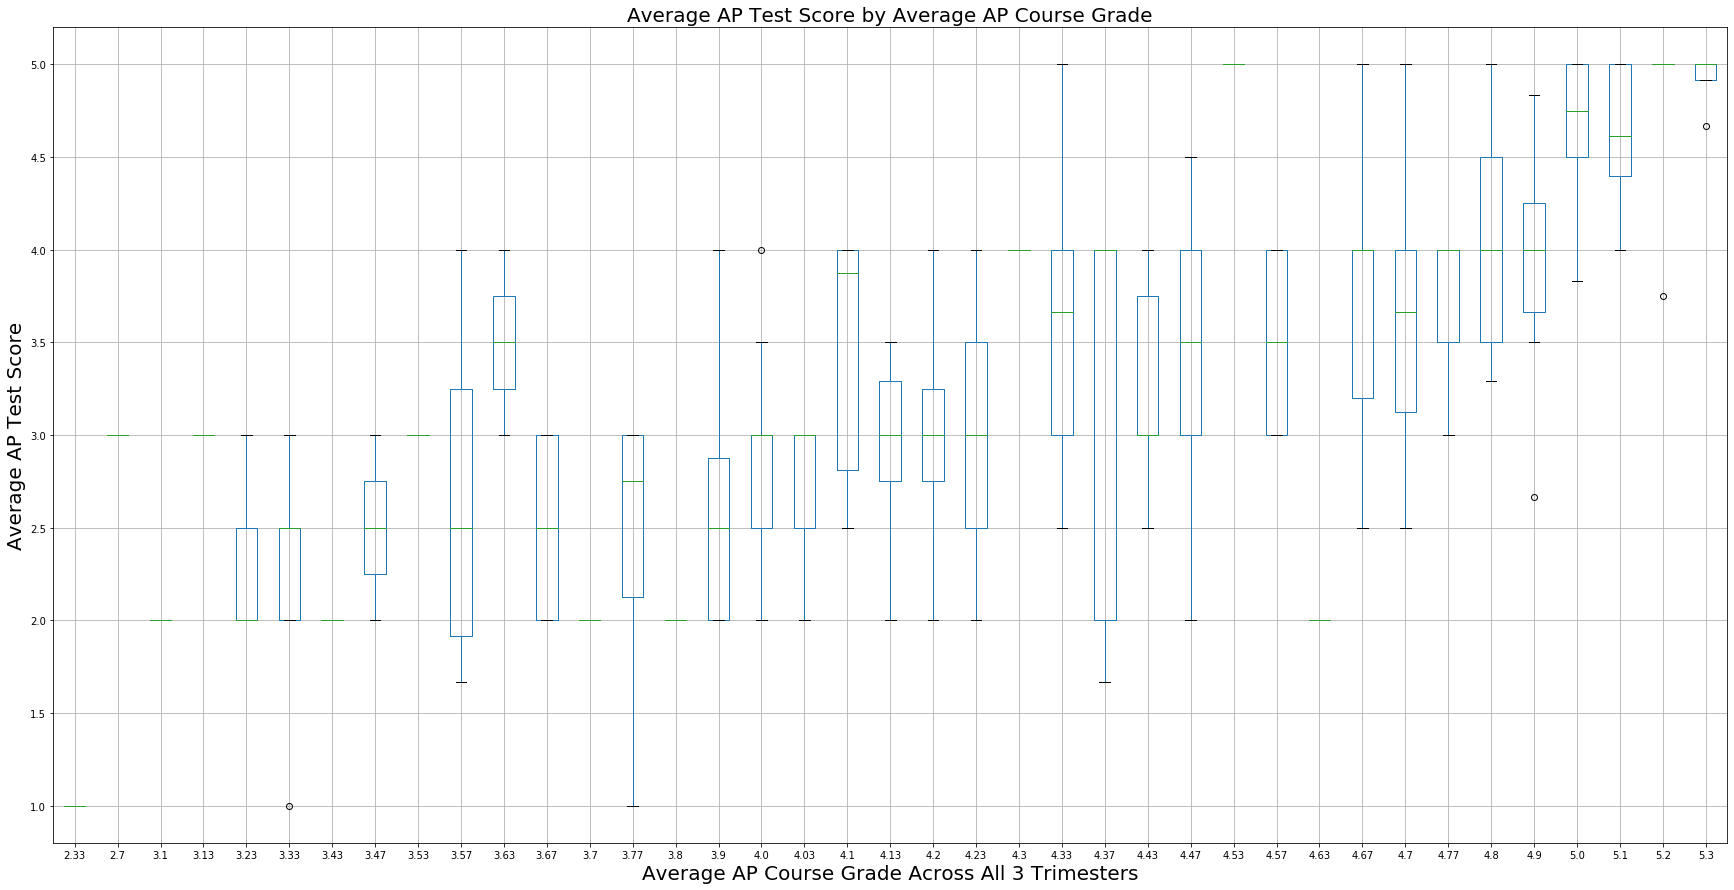

In [19]:
fig, ax = plt.subplots(figsize=(30,15))

df.groupby(['AP_Course_Title', 'Average_Course_Grade']).mean()['AP_Test_Score'].unstack().boxplot(ax=ax)

ax.set_xlabel('Average AP Course Grade Across All 3 Trimesters', fontsize = 20)
ax.set_ylabel('Average AP Test Score', fontsize = 20)
ax.set_title('Average AP Test Score by Average AP Course Grade', fontsize = 20)

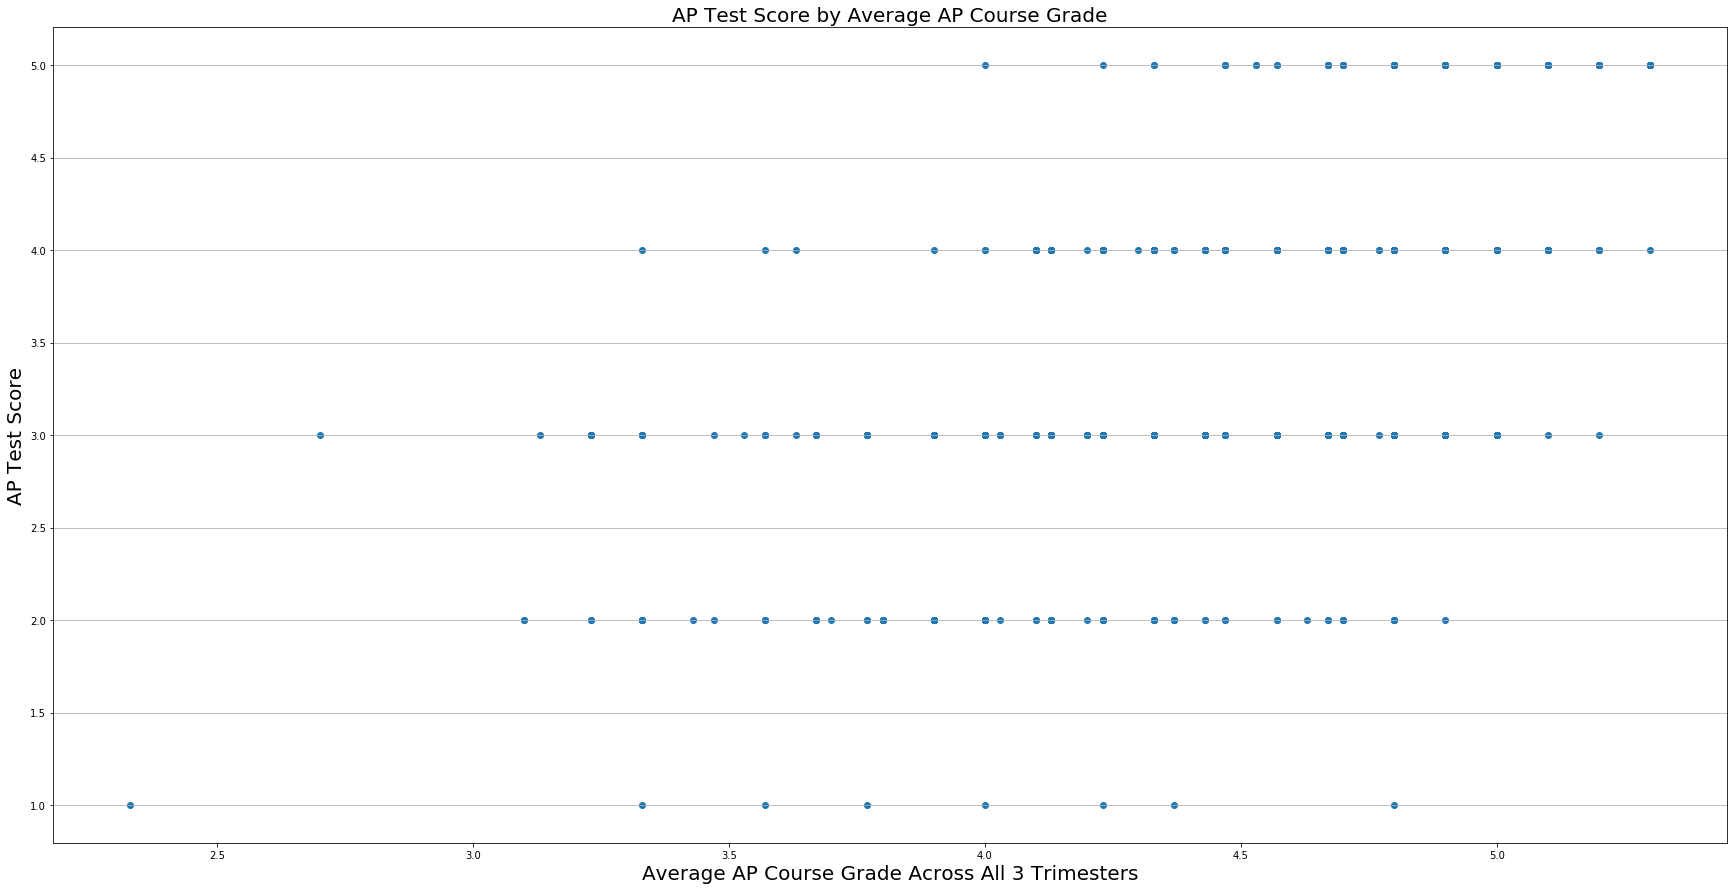

In [24]:
fig, axis = plt.subplots(figsize=(30,15))

axis.yaxis.grid(True)
axis.set_title('AP Test Score by Average AP Course Grade', fontsize = 20)
axis.set_xlabel('Average AP Course Grade Across All 3 Trimesters', fontsize = 20)
axis.set_ylabel('AP Test Score', fontsize = 20)

X = df['Average_Course_Grade']
Y = df['AP_Test_Score']

axis.scatter(X, Y)

plt.show()

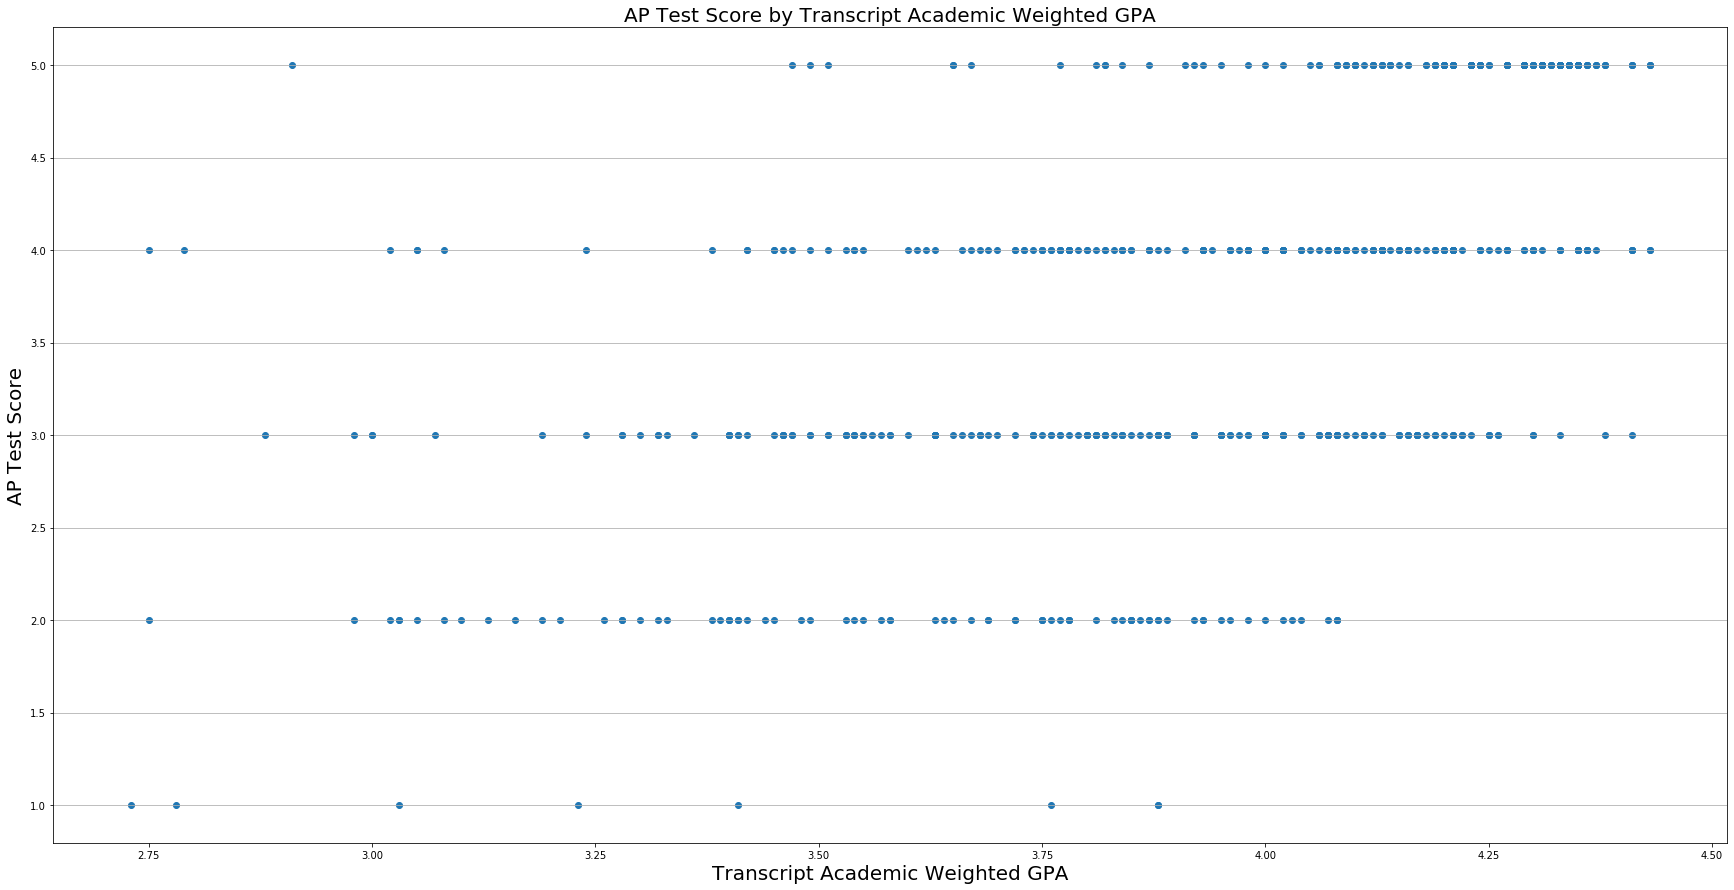

In [25]:
fig, axis = plt.subplots(figsize=(30,15))

axis.yaxis.grid(True)
axis.set_title('AP Test Score by Transcript Academic Weighted GPA', fontsize = 20)
axis.set_xlabel('Transcript Academic Weighted GPA', fontsize = 20)
axis.set_ylabel('AP Test Score', fontsize = 20)

X = df['Transcript_Academic_Weighted_GPA']
Y = df['AP_Test_Score']

axis.scatter(X, Y)

plt.show()

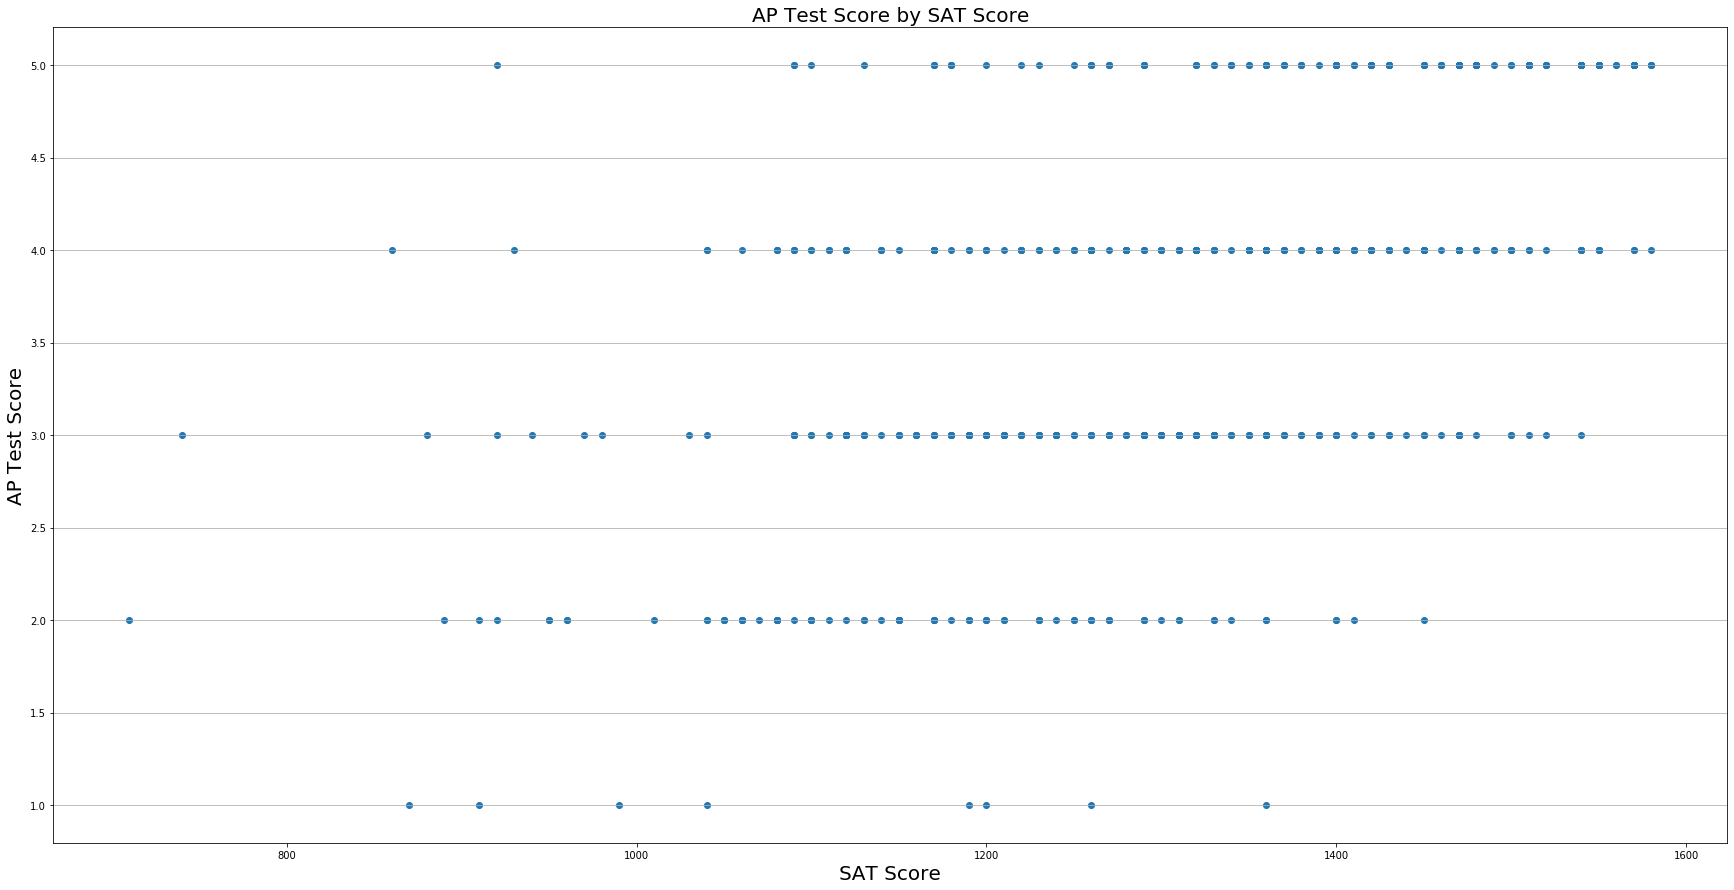

In [26]:
fig, axis = plt.subplots(figsize=(30,15))

axis.yaxis.grid(True)
axis.set_title('AP Test Score by SAT Score', fontsize = 20)
axis.set_xlabel('SAT Score', fontsize = 20)
axis.set_ylabel('AP Test Score', fontsize = 20)

X = df['SAT_Score']
Y = df['AP_Test_Score']

axis.scatter(X, Y)

plt.show()

In [48]:
#Prepare for first regression model (testing the relationship between AP course grades and AP test score)

#Declare the columns to use as features

features1 = ['Tri1_Numeric_Grade', 'Tri2_Numeric_Grade', 'Tri3_Numeric_Grade', 'Average_Course_Grade']

In [49]:
#Specify the prediction target

target1 = ['AP_Test_Score']

In [50]:
#Extract features and target values into separate DataFrames

X1 = df[features1]

In [51]:
X1.head(1)

,Tri1_Numeric_Grade,Tri2_Numeric_Grade,Tri3_Numeric_Grade,Average_Course_Grade
0,4.7,4.7,5.0,4.8


In [52]:
y1 = df[target1]

In [53]:
y1.head(1)

,AP_Test_Score
0,4


In [54]:
y1.describe()

,AP_Test_Score
count,605.000000
mean,3.669421
std,1.042066
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [55]:
#Split the DataFrame into training and testing datasets (keeping 33% of the data for testing and using the same seed value as in class)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.33, random_state = 324)

In [56]:
#Use linear regressor to fit a model to the training set (this will be compared to a Decision Tree regressor)

regressor1 = LinearRegression()

In [57]:
regressor1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#Perform prediction using the linear regression model

y_prediction1 = regressor1.predict(X_test1)

In [59]:
y_prediction1

array([[2.84640779],
       [2.78494473],
       [4.33941461],
       [3.81873058],
       [3.54124734],
       [4.23544035],
       [4.23544035],
       [3.81873058],
       [4.17397729],
       [3.94165669],
       [3.28997488],
       [2.89763088],
       [4.23544035],
       [3.88019364],
       [2.72077156],
       [3.49213386],
       [4.46505083],
       [4.23544035],
       [4.17397729],
       [4.23544035],
       [4.06729292],
       [4.23544035],
       [3.23446756],
       [3.28997488],
       [4.23544035],
       [2.84640779],
       [4.23544035],
       [3.47913774],
       [3.41561111],
       [4.23544035],
       [4.04834106],
       [3.5804082 ],
       [2.72077156],
       [4.04834106],
       [3.2016545 ],
       [2.02657855],
       [3.72174434],
       [2.54726257],
       [3.47707417],
       [4.46505083],
       [4.23544035],
       [1.60115688],
       [4.2969034 ],
       [2.55533424],
       [3.67923314],
       [4.17397729],
       [2.84640779],
       [4.109

In [60]:
#Calculate the mean of the expected target value from the test set

y_test1.describe()

,AP_Test_Score
count,200.000000
mean,3.715000
std,1.024217
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [61]:
#Evaluate the linear regression models' accuracy using the Root Mean Squared Error (RMSE)

RMSE1 = sqrt(mean_squared_error(y_true = y_test1, y_pred = y_prediction1))

In [62]:
print(RMSE1)

0.7550749353130147


In [63]:
#Use Decision Tree regressor to fit a model to the trainign set for comparsion to the linear regressor

regressor2 = DecisionTreeRegressor(max_depth = 20)

In [64]:
regressor2.fit(X_train1, y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
#Perform prediction using the Decision Tree regression model

y_prediction2 = regressor2.predict(X_test1)

In [66]:
y_prediction2

array([3.        , 2.5       , 5.        , 3.61111111, 3.75      ,
       4.52      , 4.52      , 3.61111111, 4.07692308, 3.85714286,
       3.42857143, 3.        , 4.52      , 3.41176471, 3.        ,
       3.66666667, 4.57142857, 4.52      , 4.07692308, 4.52      ,
       5.        , 4.52      , 2.5       , 3.42857143, 4.52      ,
       3.        , 4.52      , 3.25      , 3.        , 4.52      ,
       3.79166667, 3.        , 3.        , 3.79166667, 3.        ,
       2.        , 3.33333333, 3.5       , 4.        , 4.57142857,
       4.52      , 2.        , 4.5       , 2.        , 4.        ,
       4.07692308, 3.        , 4.17647059, 4.57142857, 4.52      ,
       3.25      , 4.52      , 4.17647059, 4.52      , 2.        ,
       3.79166667, 2.        , 3.        , 5.        , 3.79166667,
       3.85714286, 3.        , 3.85714286, 4.        , 4.        ,
       4.52      , 4.52      , 4.52      , 4.52      , 4.5       ,
       3.        , 4.52      , 3.85714286, 4.        , 2.     

In [67]:
#Evaluate the linear regression models' accuracy using the Root Mean Squared Error (RMSE)

RMSE2 = sqrt(mean_squared_error(y_true = y_test1, y_pred = y_prediction2))

In [68]:
print(RMSE2)

0.8054498039367661


In [ ]:
#Compare RMSE between the two models:

Linear regression model RMSE (RMSE1) = 0.755
Decision Tree regression model RMSE (RMSE2) = 0.805

The Decision Tree regression model has the lower RMSE, and better prediction accuracy

In [72]:
#Prepare for second regression model (testing the relationship between AP course grades, GPA, and SAT scores and AP test score)

#Declare the columns to use as features

features2 = ['Tri1_Numeric_Grade', 'Tri2_Numeric_Grade', 'Tri3_Numeric_Grade', 'Average_Course_Grade', 'Transcript_Academic_Weighted_GPA', 'SAT_Score']

In [73]:
#Specify the prediction target

target2 = ['AP_Test_Score']

In [74]:
#Extract features and target values into separate DataFrames

X2 = df[features2]

In [75]:
X2.head(1)

,Tri1_Numeric_Grade,Tri2_Numeric_Grade,Tri3_Numeric_Grade,Average_Course_Grade,Transcript_Academic_Weighted_GPA,SAT_Score
0,4.7,4.7,5.0,4.8,4.13,1410.0


In [76]:
y2 = df[target2]

In [77]:
y2.head(1)

,AP_Test_Score
0,4


In [78]:
y2.describe()

,AP_Test_Score
count,605.000000
mean,3.669421
std,1.042066
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [79]:
#Split the DataFrame into training and testing datasets (keeping 33% of the data for testing and using the same seed value as in class)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.33, random_state = 324)

In [80]:
#Use linear regressor to fit a model to the training set (this will be compared to a Decision Tree regressor)

regressor3 = LinearRegression()

In [81]:
regressor3.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
#Perform prediction using the linear regression model

y_prediction3 = regressor3.predict(X_test2)

In [83]:
y_prediction3

array([[3.0501166 ],
       [1.97883394],
       [3.72631406],
       [3.52382663],
       [3.80073099],
       [4.0421038 ],
       [4.65514672],
       [3.41214025],
       [3.71617727],
       [3.18129397],
       [3.50142451],
       [2.82263557],
       [4.59112819],
       [3.8080719 ],
       [2.66431287],
       [3.11472278],
       [4.62821593],
       [4.39052032],
       [4.08821392],
       [4.38795464],
       [3.5714752 ],
       [4.41670612],
       [2.72470602],
       [2.99322614],
       [4.52539921],
       [2.57451824],
       [4.44289192],
       [3.60297979],
       [3.22319792],
       [4.43177397],
       [4.53562985],
       [3.5798468 ],
       [3.04779372],
       [3.96897193],
       [3.32839544],
       [2.19861071],
       [3.63510593],
       [2.69072887],
       [3.46757375],
       [4.71286129],
       [4.45924261],
       [1.67159019],
       [4.5132733 ],
       [2.04050281],
       [3.67670904],
       [4.21828768],
       [2.94484442],
       [3.527

In [84]:
#Calculate the mean of the expected target value from the test set

y_test2.describe()

,AP_Test_Score
count,200.000000
mean,3.715000
std,1.024217
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [85]:
#Evaluate the linear regression models' accuracy using the Root Mean Squared Error (RMSE)

RMSE3 = sqrt(mean_squared_error(y_true = y_test2, y_pred = y_prediction3))

In [86]:
print(RMSE3)

0.727007607923613


In [87]:
#Use Decision Tree regressor to fit a model to the trainign set for comparsion to the linear regressor

regressor4 = DecisionTreeRegressor(max_depth = 20)

In [88]:
regressor4.fit(X_train2, y_train2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [89]:
#Perform prediction using the Decision Tree regression model

y_prediction4 = regressor4.predict(X_test2)

In [90]:
y_prediction4

array([2. , 1. , 3. , 3. , 4. , 2. , 5. , 5. , 5. , 4. , 3. , 3. , 4. ,
       3. , 2. , 4. , 4. , 4. , 5. , 4. , 4. , 5. , 3. , 4. , 4.5, 2. ,
       5. , 5. , 4. , 4. , 5. , 3. , 2. , 4. , 4. , 1. , 4. , 3. , 4. ,
       5. , 5. , 3. , 5. , 2. , 4. , 4. , 1. , 5. , 4. , 4.5, 4. , 5. ,
       3. , 4.5, 2. , 4. , 3. , 3. , 4. , 4. , 3. , 3. , 2. , 2. , 3. ,
       5. , 4. , 5. , 3. , 4. , 3. , 5. , 4. , 2. , 2. , 4. , 4. , 3. ,
       4. , 5. , 4. , 4. , 3. , 5. , 4. , 5. , 4. , 2. , 4. , 3. , 4. ,
       2. , 4. , 5. , 4. , 2. , 3. , 5. , 5. , 2. , 4. , 4. , 4. , 3. ,
       5. , 3. , 5. , 5. , 5. , 4. , 4. , 4. , 4. , 5. , 4. , 5. , 4. ,
       5. , 4.5, 5. , 5. , 5. , 4. , 2. , 5. , 4. , 2. , 2. , 5. , 3. ,
       3. , 4. , 2. , 5. , 5. , 4. , 5. , 3. , 5. , 1. , 4. , 5. , 4.5,
       5. , 4. , 2. , 5. , 2. , 4. , 5. , 5. , 2. , 4. , 3. , 2. , 5. ,
       4. , 3. , 3. , 4. , 5. , 3. , 4. , 5. , 3. , 3. , 4. , 3. , 3. ,
       4. , 4. , 4.5, 4. , 1. , 5. , 2. , 5. , 3. , 5. , 5. , 5.

In [91]:
#Evaluate the linear regression models' accuracy using the Root Mean Squared Error (RMSE)

RMSE4 = sqrt(mean_squared_error(y_true = y_test2, y_pred = y_prediction4))

In [92]:
print(RMSE4)

1.0331989159885913


In [ ]:
#Compare RMSE between the two models:

Linear regression model RMSE (RMSE3) = 0.727
Decision Tree regression model RMSE (RMSE4) = 1.033

The Decision Tree regression model has the lower RMSE, and better prediction accuracy

In [ ]:
#Compare the two models overall:

#The first regression model (testing the relationship between AP course grades and AP test score) 

Showed a higher RMSE for the linear regression model despite fewer features


#The second regression model (testing the relationship between AP course grades, GPA, and SAT scores and AP test score)


Showed the highest overall RMSE between the two mdoels for the Decision Tree regression model. It appears that additional features 
in this model allowed for greater model prediction accuracy.
